In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Кустова', 'Адель', 'Ростин'],
  ['Кустова', 'Адель', 'Ростин', 'Катя'],
  ['Кустова', 'Чепелев', 'Катя'],
  ['Кустова', 'Чепелев', 'Катя', 'Адель'],
  ['Кустова', 'Чепелев', 'Катя', 'Адель', 'Фёдор', 'Ростин']],
 [['Геосиманский', 'Елена', 'Багрецов', 'Иван', 'Чепелев', 'Адольф', 'Кратов', 'Копытов', 'Матрена Викторовна', 'Лидия'],
  ['Елена', 'Багрецов', 'Иван', 'Чепелев', 'Адольф', 'Матрена Викторовна'],
  ['Елена', 'Багрецов', 'Иван', 'Чепелев', 'Адольф', 'Матрена Викторовна', 'Геосиманский'],
  ['Елена', 'Багрецов', 'Иван', 'Чепелев', 'Адольф', 'Матрена Викторовна', 'Геосиманский', 'Лев'],
  ['Елена', 'Багрецов', 'Иван', 'Чепелев', 'Адольф', 'Матрена Викторовна', 'Геосиманский', 'Лев'],
  ['Елена'],
  ['Елена', 'Геосиманский']],
 [['Савелий', 'Катя'],
  ['Кустова', 'Адель', 'Савелий', 'Катя'],
  ['Кустова', 'Терешина'],
  ['Кустова', 'Терешина', 'Адель'],
  ['Адель', 'Кустова'],
  ['Адель', 'Кустова', 'Терешина'],
  ['Адель', 'Кустова', 'Терешина', 'Лев', 'Лакей'],
  ['Кустова', 'Терешина'],
  ['Адель', 'Лев'],
  ['Адель', 'Лев', 'Лакей', 'Багрецов'],
  ['Адель', 'Лев', 'Багрецов', 'Кустова', 'Терешина'],
  ['Адель', 'Багрецов', 'Кустова', 'Терешина'],
  ['Адель', 'Багрецов', 'Кустова', 'Терешина', 'Чепелев']],
 [['Усачев', 'Адольф', 'Кондуктор', 'Семья Усачева', 'Ефим'],
  ['Шелопаи', 'Багрецов'],
  ['Шелопаи', 'Багрецов', 'Елена', 'Лев', 'Терешина', 'Горничная'],
  ['Терешина', 'Ростин', 'Ростин-отец'],
  ['Усачев', 'Адольф', 'Ефим', 'Шелопаи', 'Кустова', 'Савелий'],
  ['Усачев', 'Адольф', 'Ефим', 'Шелопаи', 'Кустова', 'Савелий', 'Елена', 'Лев'],
  ['Усачев', 'Адольф', 'Ефим', 'Шелопаи', 'Кустова', 'Савелий', 'Елена', 'Лев', 'Ростин', 'Ростин-отец'],
  ['Усачев', 'Адольф', 'Ефим', 'Шелопаи', 'Кустова', 'Савелий', 'Елена', 'Лев', 'Ростин', 'Ростин-отец', 'Кратов', 'Лидия', 'Адель', 'Обер-кондуктор'],
  ['Усачев', 'Семья Усачева', 'Адольф', 'Ефим', 'Шелопаи', 'Кустова', 'Савелий', 'Елена', 'Лев', 'Ростин', 'Ростин-отец', 'Кратов', 'Лидия', 'Адель', 'Обер-кондуктор', 'Кондуктор', 'Терешина']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,II.1,II.2,II.3,II.4,II.5,II.6,II.7,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,III.11,III.12,III.13,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,IV.9
Адель,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1
Адольф,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1
Багрецов,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0
Геосиманский,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Горничная,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Елена,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1
Ефим,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1
Иван,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Катя,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Кондуктор,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,пьеса
Адель,0.25,,0.33,0,0.27
Адольф,,0,,0.12,0.12
Багрецов,,0,0,0.12,0.15
Геосиманский,,0.5,,,0.15
Горничная,,,,0.12,0.03
Елена,,,,0.25,0.12
Ефим,,,,0.12,0.06
Иван,,0,,,0.03
Катя,0,,0,,0.09
Кондуктор,,,,0.12,0.06


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.19


,1,2,3,4,5,6,7,8,9,10,11,12,13,действия
1,0.11,0.15,0.11,0.15,0.22,,,,,,,,,0.15
2,0.37,0.22,0.26,0.30,0.30,0.04,0.07,,,,,,,0.22
3,0.07,0.15,0.07,0.11,0.07,0.11,0.19,0.07,0.07,0.15,0.19,0.15,0.19,0.12
4,0.19,0.07,0.22,0.11,0.22,0.3,0.37,0.52,0.63,,,,,0.29


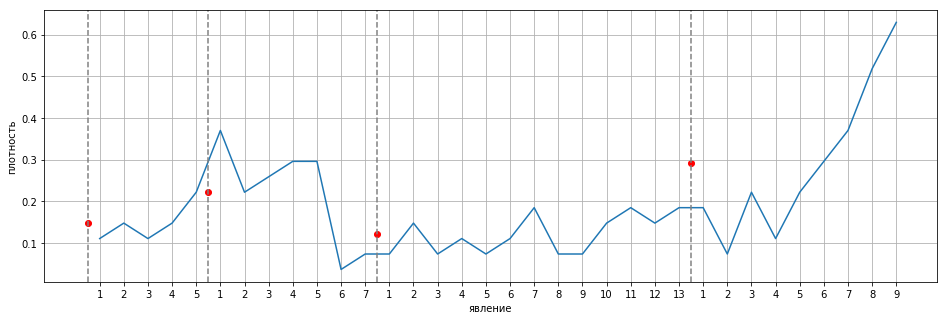

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

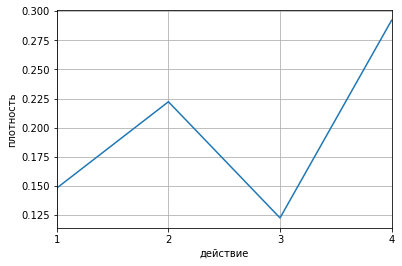

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1     2     3     4  пьеса
Адель              Адольф                               0.44   0.68
                   Багрецов                       0.46  0.44   0.56
                   Геосиманский                                0.62
                   Горничная                            0.33   0.50
                   Елена                                0.33   0.71
                   Ефим                                 0.44   0.53
                   Иван                                        0.62
                   Катя                0.4        0.77         0.41
                   Кондуктор                            0.22   0.47
                   Копытов                                     0.50
                   Кратов                                  0   0.44
                   Кустова             0.2        0.31  0.33   0.24
                   Лакей                          0.62         0.41
                   Лев                            0.46  0.33   0.44
                   Лидия                                   0   0.44
                   Матрена Викторовна                          0.62
                   Обер-кондуктор                          0   0.41
                   Ростин              0.2              0.22   0.38
                   Ростин-отец                          0.22   0.47
                   Савелий                        0.77  0.33   0.50
                   Семья Усачева                        0.22   0.47
                   Терешина                       0.46  0.33   0.38
                   Усачев                               0.44   0.53
                   Фёдор               0.6                     0.44
                   Чепелев             0.6        0.69         0.56
                   Шелопаи                              0.56   0.56
Адольф             Адель                                0.44   0.68
                   Багрецов                    0        0.89   0.35
                   Геосиманский             0.29               0.24
                   Горничная                            0.78   0.35
                   Елена                    0.29        0.33   0.15
                   Ефим                                    0   0.15
                   Иван                        0               0.18
                   Катя                                        0.50
                   Кондуктор                            0.44   0.26
                   Копытов                  0.57               0.29
                   Кратов                   0.57        0.44   0.24
                   Кустова                              0.11   0.62
                   Лакей                                       0.38
                   Лев                      0.43        0.33   0.29
                   Лидия                    0.57        0.44   0.24
                   Матрена Викторовна          0               0.18
                   Обер-кондуктор                       0.44   0.26
                   Ростин                               0.44   0.35
                   Ростин-отец                          0.44   0.26
                   Савелий                              0.11   0.24
                   Семья Усачева                        0.44   0.26
                   Терешина                             0.78   0.59
                   Усачев                                  0   0.15
                   Фёдор                                       0.35
                   Чепелев                     0               0.29
                   Шелопаи                              0.33   0.24
Багрецов           Адель                          0.46  0.44   0.56
                   Адольф                      0        0.89   0.35
                   Геосиманский             0.29               0.24
                   Горничная                            0.11   0.29
                   Елена                    0.29        0.56   0.32
                   Ефим                                 0.89   0.50
                   Иван      

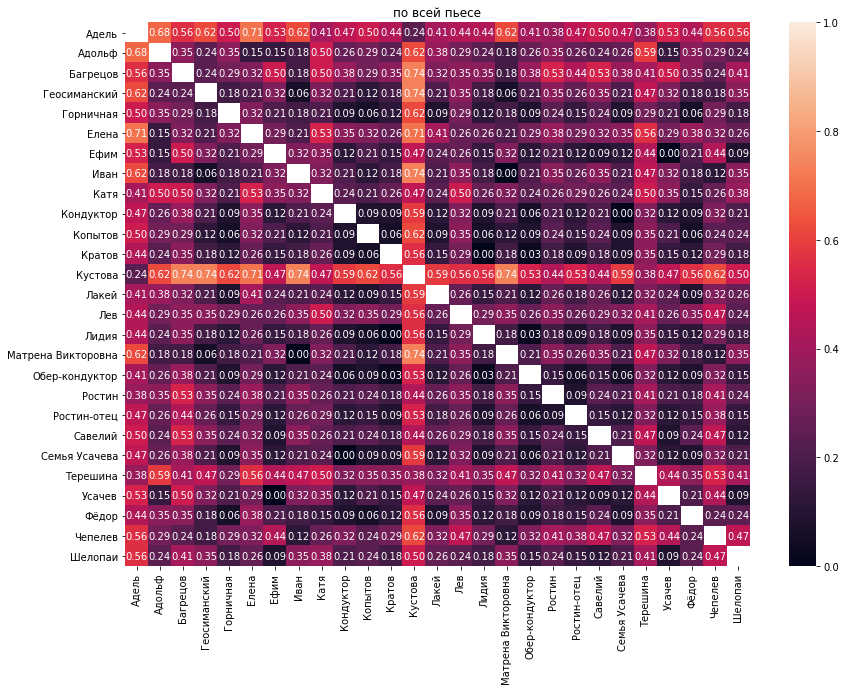

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

Ефим = Усачев
Иван = Матрена Викторовна
Кондуктор = Семья Усачева
Кратов = Лидия


## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

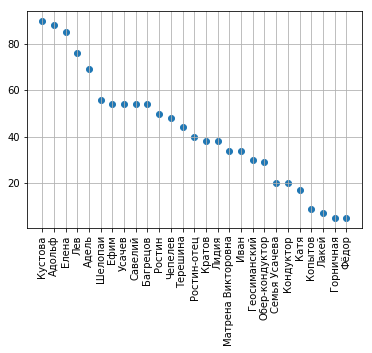

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Кустова,Адольф,Елена,Лев,Адель,Шелопаи,Ефим,Усачев,Савелий,Багрецов,Ростин,Чепелев,Терешина,Ростин-отец,Кратов,Лидия,Матрена Викторовна,Иван,Геосиманский,Обер-кондуктор,Семья Усачева,Кондуктор,Катя,Копытов,Лакей,Горничная,Фёдор
ранг,90,88,85,76,69,56,54,54,54,54,50,48,44,40,38,38,34,34,30,29,20,20,17,9,7,5,5


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,пьеса
Кустова,1,,0.77,0.56,0.59
Адель,0.8,,0.77,0.22,0.47
Елена,,1,,0.56,0.35
Багрецов,,0.71,0.31,0.22,0.32
Терешина,,,0.62,0.33,0.32
Лев,,0.29,0.31,0.56,0.32
Адольф,,0.71,,0.67,0.32
Чепелев,0.6,0.71,0.08,,0.26
Савелий,,,0.15,0.56,0.21
Ростин,0.6,,,0.44,0.21


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,Адель,Адольф,Багрецов,Геосиманский,Горничная,Елена,Ефим,Иван,Катя,Кондуктор,Копытов,Кратов,Кустова,Лакей,Лев,Лидия,Матрена Викторовна,Обер-кондуктор,Ростин,Ростин-отец,Савелий,Семья Усачева,Терешина,Усачев,Фёдор,Чепелев,Шелопаи
Адель,,,,,,,,,0.75,,,,0.8,,,,,,1,,,,,,1,0.67,
Адольф,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,
Багрецов,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,
Геосиманский,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,
Горничная,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,
Елена,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,
Ефим,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,
Иван,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,
Катя,0.75,,,,,,,,,,,,0.8,,,,,,0.67,,,,,,1,1,
Кондуктор,0,,,,,,,,0,,,,0,,,,,,0,,,,,,0,0,


Действие 2


,Адель,Адольф,Багрецов,Геосиманский,Горничная,Елена,Ефим,Иван,Катя,Кондуктор,Копытов,Кратов,Кустова,Лакей,Лев,Лидия,Матрена Викторовна,Обер-кондуктор,Ростин,Ростин-отец,Савелий,Семья Усачева,Терешина,Усачев,Фёдор,Чепелев,Шелопаи
Адель,,0,0,0,,0,,0,,,0,0,,,0,0,0,,,,,,,,,0,
Адольф,,,1,0.8,,0.71,,1,,,1,1,,,1,1,1,,,,,,,,,1,
Багрецов,,1,,0.8,,0.71,,1,,,1,1,,,1,1,1,,,,,,,,,1,
Геосиманский,,0.8,0.8,,,0.71,,0.8,,,1,1,,,1,1,0.8,,,,,,,,,0.8,
Горничная,,0,0,0,,0,,0,,,0,0,,,0,0,0,,,,,,,,,0,
Елена,,1,1,1,,,,1,,,1,1,,,1,1,1,,,,,,,,,1,
Ефим,,0,0,0,,0,,0,,,0,0,,,0,0,0,,,,,,,,,0,
Иван,,1,1,0.8,,0.71,,,,,1,1,,,1,1,1,,,,,,,,,1,
Катя,,0,0,0,,0,,0,,,0,0,,,0,0,0,,,,,,,,,0,
Кондуктор,,0,0,0,,0,,0,,,0,0,,,0,0,0,,,,,,,,,0,


Действие 3


,Адель,Адольф,Багрецов,Геосиманский,Горничная,Елена,Ефим,Иван,Катя,Кондуктор,Копытов,Кратов,Кустова,Лакей,Лев,Лидия,Матрена Викторовна,Обер-кондуктор,Ростин,Ростин-отец,Савелий,Семья Усачева,Терешина,Усачев,Фёдор,Чепелев,Шелопаи
Адель,,,1,,,,,,0.5,,,,0.8,1,1,,,,,,0.5,,0.75,,,1,
Адольф,0,,0,,,,,,0,,,,0,0,0,,,,,,0,,0,,,0,
Багрецов,0.4,,,,,,,,0,,,,0.3,0.5,0.5,,,,,,0,,0.38,,,1,
Геосиманский,0,,0,,,,,,0,,,,0,0,0,,,,,,0,,0,,,0,
Горничная,0,,0,,,,,,0,,,,0,0,0,,,,,,0,,0,,,0,
Елена,0,,0,,,,,,0,,,,0,0,0,,,,,,0,,0,,,0,
Ефим,0,,0,,,,,,0,,,,0,0,0,,,,,,0,,0,,,0,
Иван,0,,0,,,,,,0,,,,0,0,0,,,,,,0,,0,,,0,
Катя,0.1,,0,,,,,,,,,,0.1,0,0,,,,,,1,,0,,,0,
Кондуктор,0,,0,,,,,,0,,,,0,0,0,,,,,,0,,0,,,0,


Действие 4


,Адель,Адольф,Багрецов,Геосиманский,Горничная,Елена,Ефим,Иван,Катя,Кондуктор,Копытов,Кратов,Кустова,Лакей,Лев,Лидия,Матрена Викторовна,Обер-кондуктор,Ростин,Ростин-отец,Савелий,Семья Усачева,Терешина,Усачев,Фёдор,Чепелев,Шелопаи
Адель,,0.33,0,,0,0.4,0.33,,,0.5,,1,0.4,,0.4,1,,1,0.5,0.5,0.4,0.5,0.33,0.33,,,0.29
Адольф,1,,0,,0,0.8,1,,,1,,1,1,,0.8,1,,1,0.75,0.75,1,1,0.33,1,,,0.71
Багрецов,0,0,,,1,0.2,0,,,0,,0,0,,0.2,0,,0,0,0,0,0,0.33,0,,,0.29
Геосиманский,0,0,0,,0,0,0,,,0,,0,0,,0,0,,0,0,0,0,0,0,0,,,0
Горничная,0,0,0.5,,,0.2,0,,,0,,0,0,,0.2,0,,0,0,0,0,0,0.33,0,,,0.14
Елена,1,0.67,0.5,,1,,0.67,,,0.5,,1,0.8,,1,1,,1,0.75,0.75,0.8,0.5,0.67,0.67,,,0.71
Ефим,1,1,0,,0,0.8,,,,1,,1,1,,0.8,1,,1,0.75,0.75,1,1,0.33,1,,,0.71
Иван,0,0,0,,0,0,0,,,0,,0,0,,0,0,,0,0,0,0,0,0,0,,,0
Катя,0,0,0,,0,0,0,,,0,,0,0,,0,0,,0,0,0,0,0,0,0,,,0
Кондуктор,0.5,0.33,0,,0,0.2,0.33,,,,,0.5,0.2,,0.2,0.5,,0.5,0.25,0.25,0.2,1,0.33,0.33,,,0.14


По всей пьесе


,Адель,Адольф,Багрецов,Геосиманский,Горничная,Елена,Ефим,Иван,Катя,Кондуктор,Копытов,Кратов,Кустова,Лакей,Лев,Лидия,Матрена Викторовна,Обер-кондуктор,Ростин,Ростин-отец,Савелий,Семья Усачева,Терешина,Усачев,Фёдор,Чепелев,Шелопаи
Адель,,0.18,0.36,0,0,0.17,0.33,0,0.67,0.5,0,0.67,0.7,1,0.55,0.67,0,1,0.71,0.5,0.43,0.5,0.64,0.33,1,0.33,0.29
Адольф,0.12,,0.45,0.8,0,0.75,1,1,0,1,1,1,0.25,0,0.55,1,1,1,0.43,0.75,0.71,1,0.09,1,0,0.56,0.71
Багрецов,0.25,0.45,,0.8,1,0.5,0,1,0,0,1,0.33,0.15,0.5,0.45,0.33,1,0,0,0,0,0,0.36,0,0,0.67,0.29
Геосиманский,0,0.36,0.36,,0,0.42,0,0.8,0,0,1,0.33,0,0,0.18,0.33,0.8,0,0,0,0,0,0,0,0,0.44,0
Горничная,0,0,0.09,0,,0.08,0,0,0,0,0,0,0,0,0.09,0,0,0,0,0,0,0,0.09,0,0,0,0.14
Елена,0.12,0.82,0.55,1,1,,0.67,1,0,0.5,1,1,0.2,0,0.64,1,1,1,0.43,0.75,0.57,0.5,0.18,0.67,0,0.56,0.71
Ефим,0.12,0.55,0,0,0,0.33,,0,0,1,0,0.67,0.25,0,0.36,0.67,0,1,0.43,0.75,0.71,1,0.09,1,0,0,0.71
Иван,0,0.45,0.45,0.8,0,0.42,0,,0,0,1,0.33,0,0,0.18,0.33,1,0,0,0,0,0,0,0,0,0.56,0
Катя,0.25,0,0,0,0,0,0,0,,0,0,0,0.25,0,0,0,0,0,0.29,0,0.29,0,0,0,1,0.33,0
Кондуктор,0.06,0.18,0,0,0,0.08,0.33,0,0,,0,0.33,0.05,0,0.09,0.33,0,0.5,0.14,0.25,0.14,1,0.09,0.33,0,0,0.14


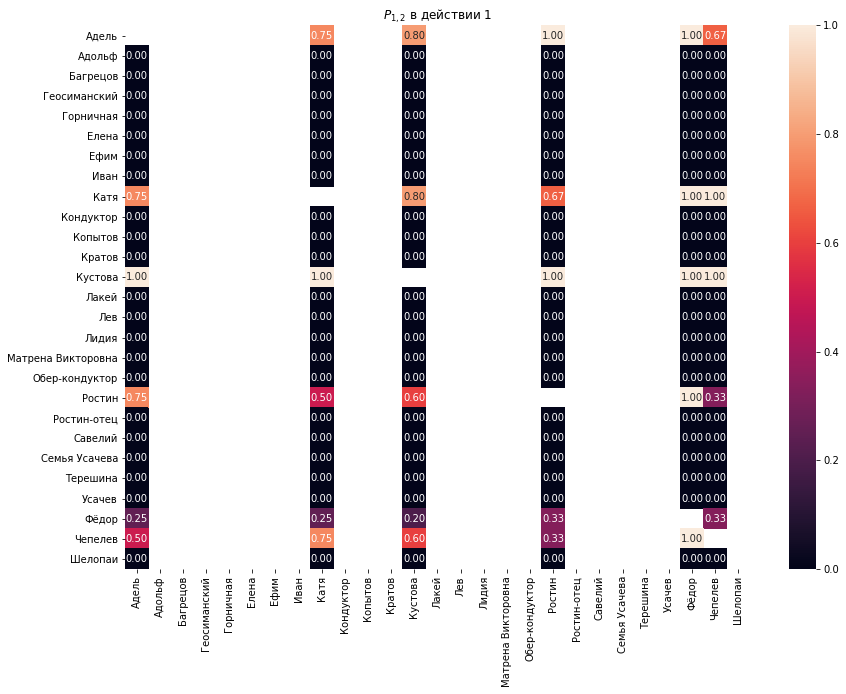

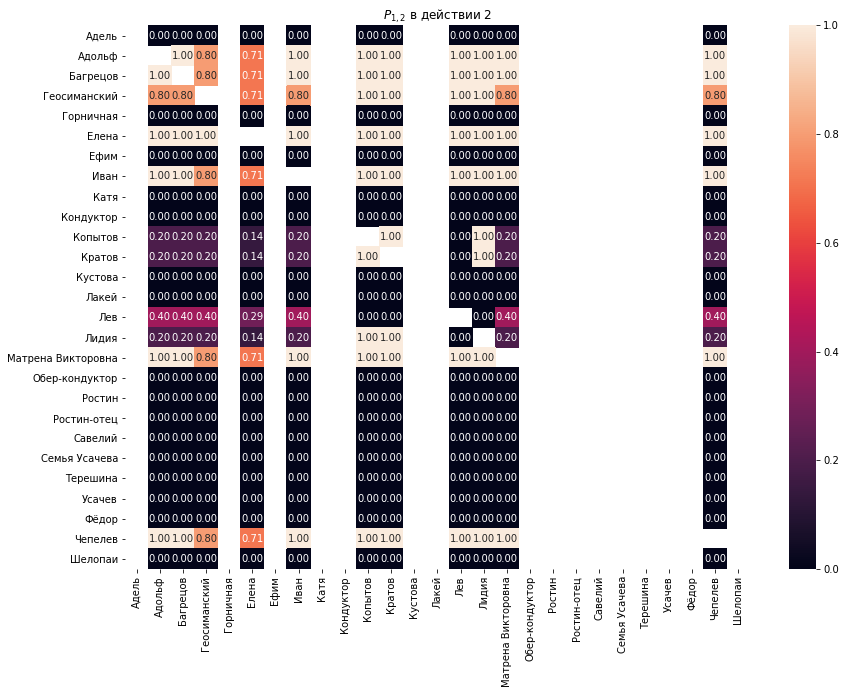

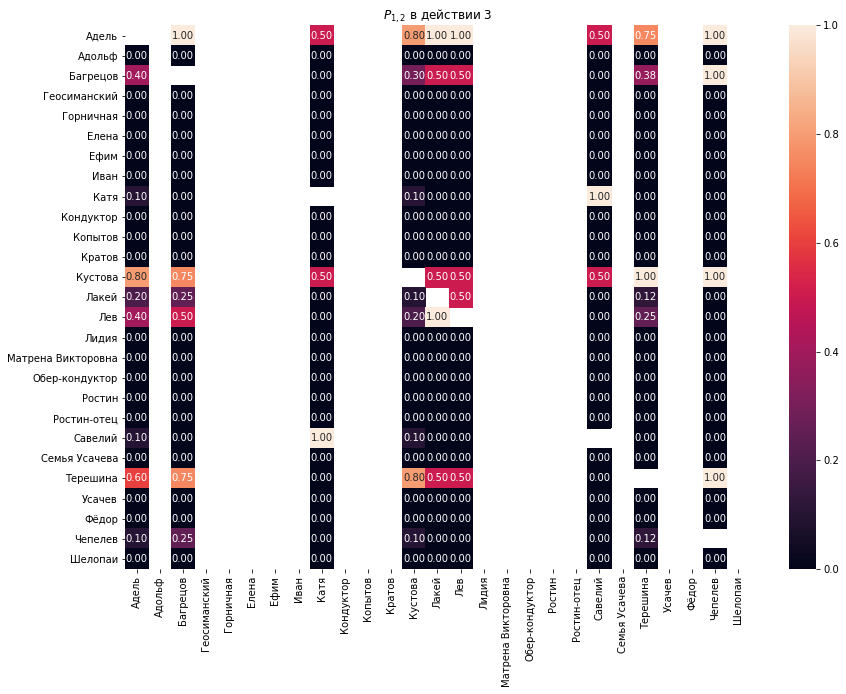

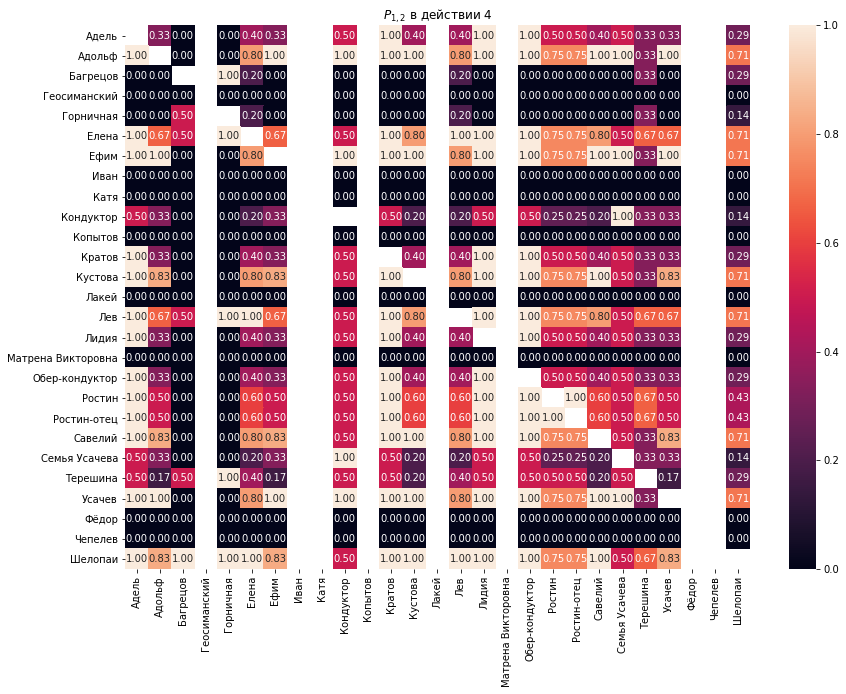

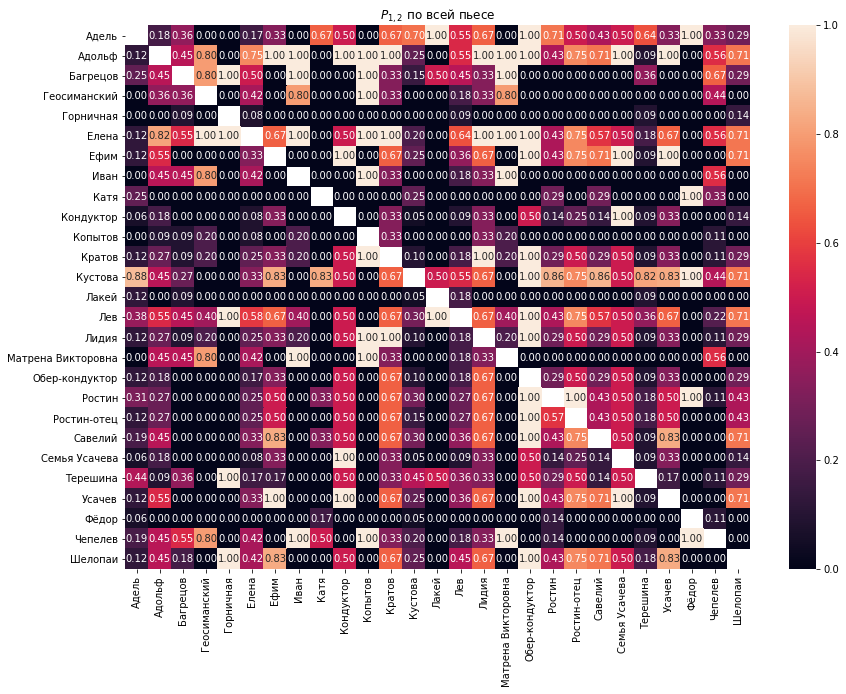

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

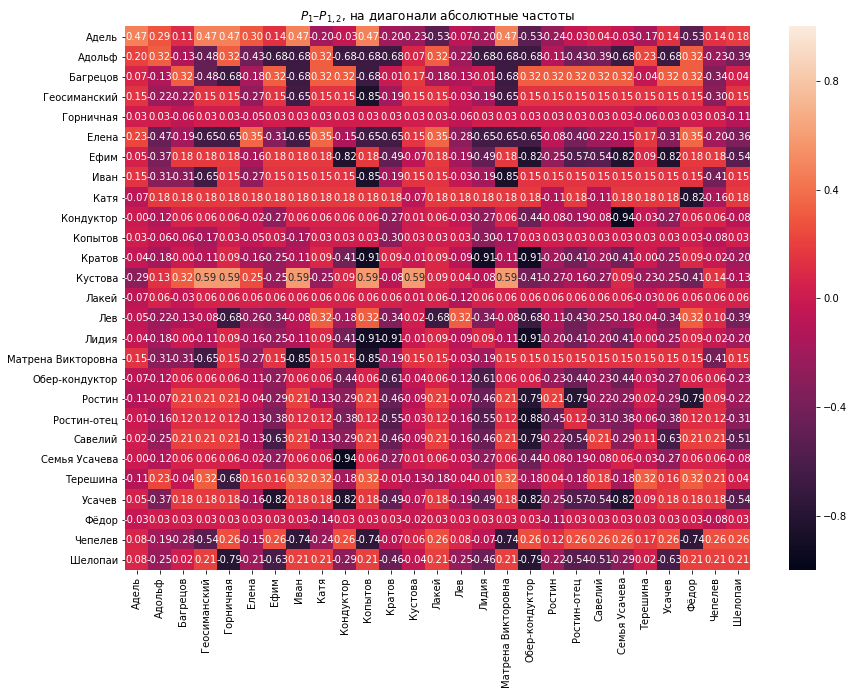

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");